# 1.Download the dataset from the source here.
About the dataset:

This dataset is all about churn modelling of a credit company. It has the details about the end user who are using credit card and also it has some variables to depicit the churn of the customer.

RowNumber - Serial number of the rows
CustomerId - Unique identification of customer
Surname - Name of the customer
CreditScore - Cipil score of the customer
Geography - Location of the bank
Gender - Sex of the customer
Age - Age of the customer
Tenure - Repayment period for the credit amount
Balance - Current balance in thier creidt card
NumOfProducts - Products owned by the customer from the company
HasCrCard - Has credit card or not (0 - no , 1 - yes)
IsactiveMember - Is a active member or not
EstimatedSalary - Salary of the customer
Exited - Churn of the customer



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the dataset

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# 3 a). Univariate analysis

In [ ]:
#checking for categorical variables
category = df.select_dtypes(include=[np.object])
print("Categorical Variables: ",category.shape[1])

#checking for numerical variables
numerical = df.select_dtypes(include=[np.int64,np.float64])
print("Numerical Variables: ",numerical.shape[1])

Categorical Variables:  3
Numerical Variables:  11


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

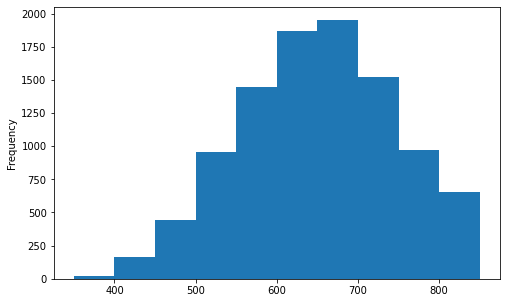

In [ ]:
credit = df['CreditScore']
credit.plot(kind="hist",figsize=(8,5))

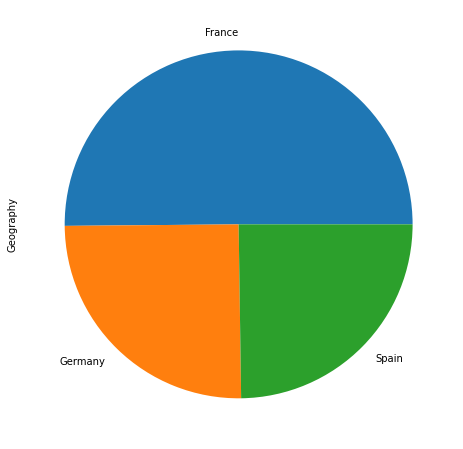

In [ ]:
geo = df['Geography'].value_counts()
geo.plot(kind="pie",figsize=(10,8))

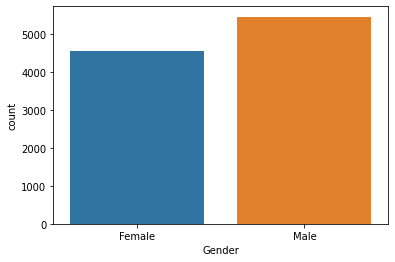

In [ ]:
sns.countplot(df['Gender'])

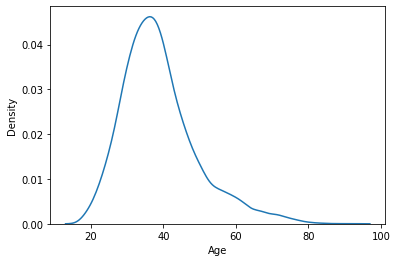

In [ ]:
sns.distplot(df['Age'],hist=False)

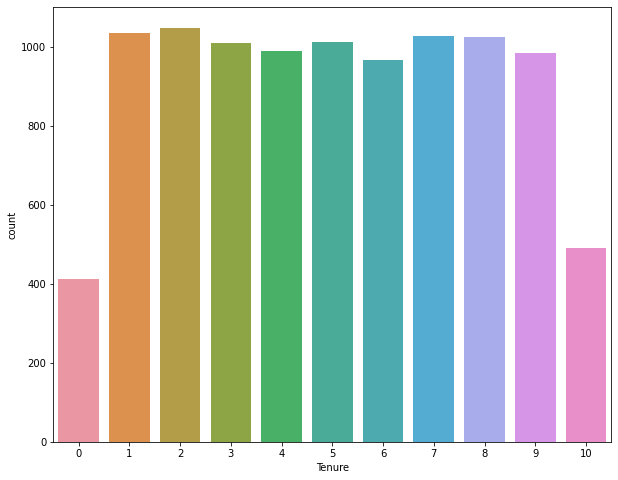

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['Tenure'])

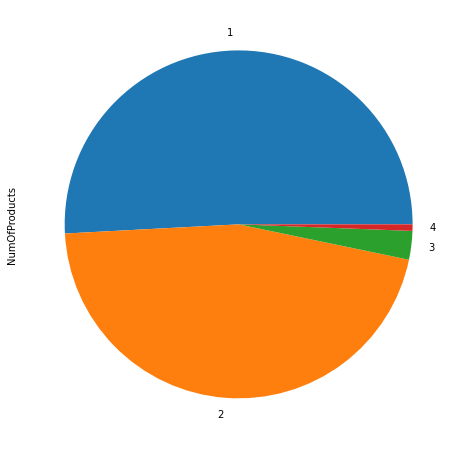

In [ ]:
product = df['NumOfProducts'].value_counts()
product.plot(kind="pie",figsize=(10,8))

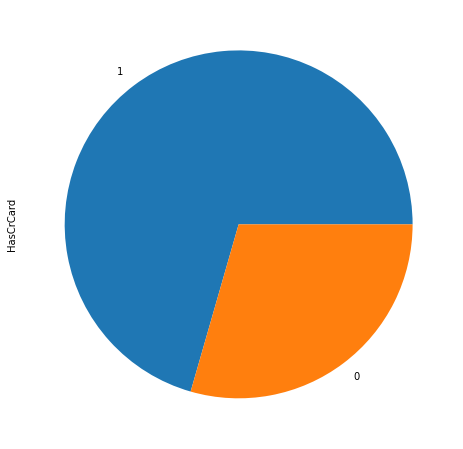

In [ ]:
cr = df['HasCrCard'].value_counts()
cr.plot(kind="pie",figsize=(10,8))

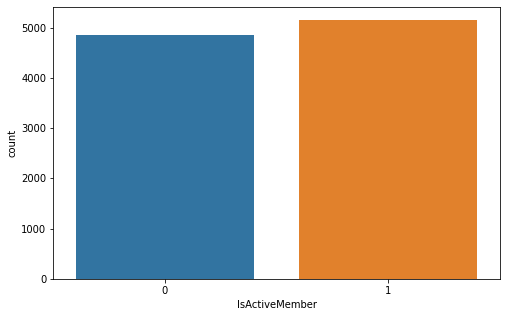

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['IsActiveMember'])

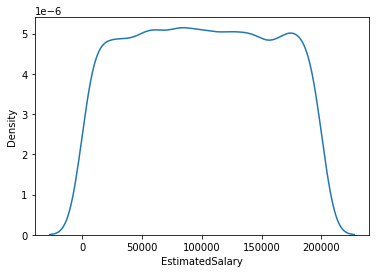

In [ ]:
sns.distplot(df['EstimatedSalary'],hist=False)

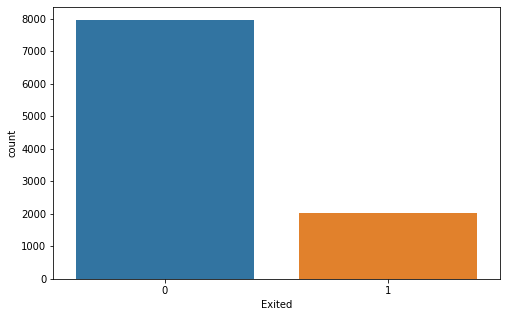

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['Exited'])

# 3 b). Bivariate analysis

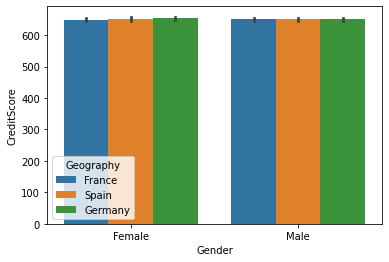

In [ ]:
sns.barplot(x='Gender',y='CreditScore',hue='Geography',data=df)

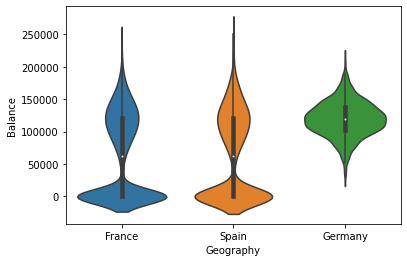

In [ ]:
sns.violinplot(x='Geography',y='Balance',data=df)

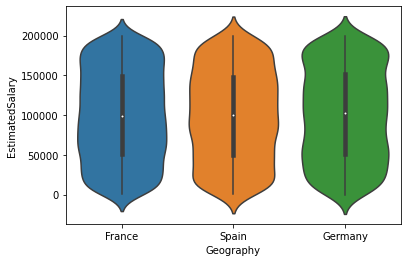

In [ ]:
sns.violinplot(x='Geography',y='EstimatedSalary',data=df)

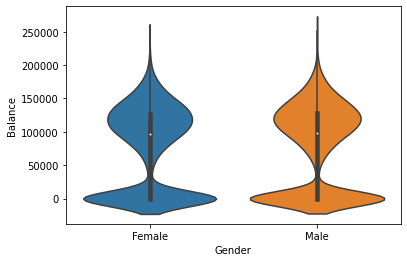

In [ ]:
sns.violinplot(x='Gender',y='Balance',data=df)

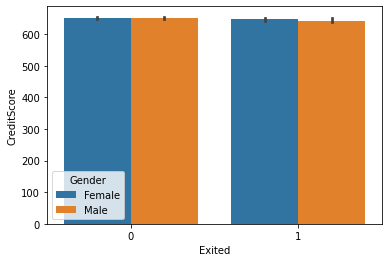

In [ ]:
sns.barplot(x='Exited',y='CreditScore',hue='Gender',data=df)

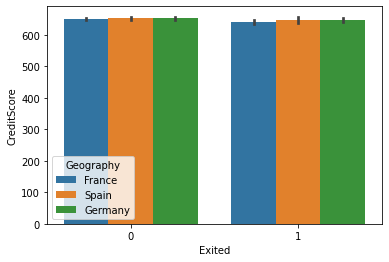

In [ ]:
sns.barplot(x='Exited',y='CreditScore',hue='Geography',data=df)

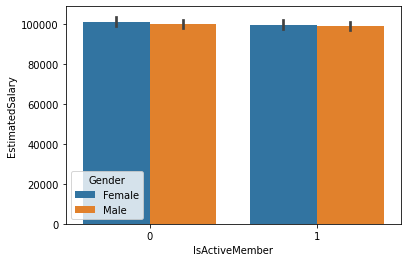

In [ ]:
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df)

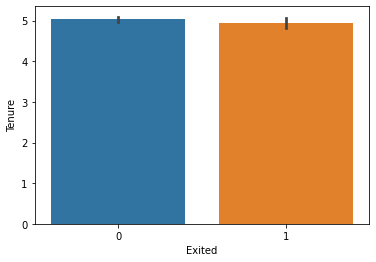

In [ ]:
sns.barplot(x='Exited',y='Tenure',data=df)

# 3 c). Multivariate analysis

Gender  Geography
Female  France       2261
        Germany      1193
        Spain        1089
Male    France       2753
        Spain        1388
        Germany      1316
Name: Geography, dtype: int64


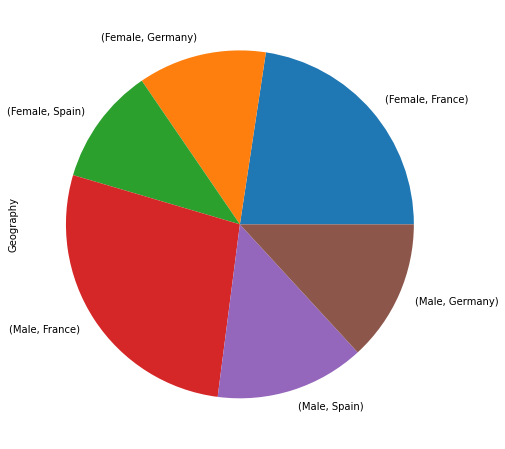

In [ ]:
gp1 = df.groupby('Gender')['Geography'].value_counts()
gp1.plot(kind='pie',figsize=(10,8))
print(gp1)

In [ ]:
gp2 = df.groupby('Gender')['Age'].mean()
print(gp2)

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64


In [ ]:
gp3 = df.groupby(['Gender','Geography'])['Tenure'].mean()
print(gp3)

Gender  Geography
Female  France       4.950022
        Germany      4.965633
        Spain        5.000000
Male    France       5.049401
        Germany      5.050152
        Spain        5.057637
Name: Tenure, dtype: float64


Gender  HasCrCard  IsActiveMember
Female  0          0                 102006.080352
                   1                 102648.996944
        1          0                 101208.014567
                   1                  98510.152300
Male    0          0                  99756.431151
                   1                  99873.931251
        1          0                 100353.378996
                   1                  98914.378703
Name: EstimatedSalary, dtype: float64


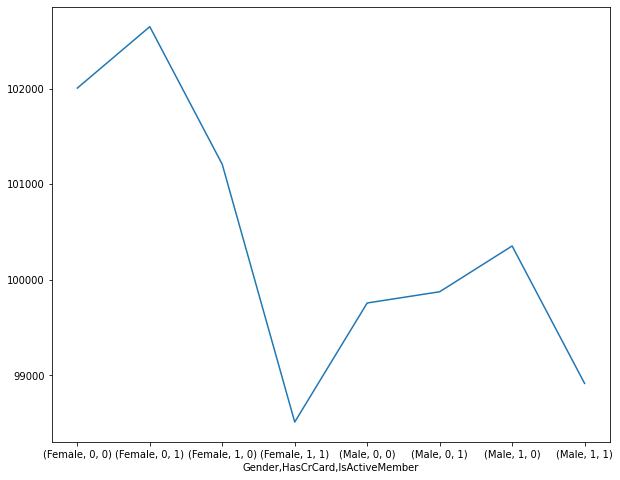

In [ ]:
gp4 = df.groupby(['Gender','HasCrCard','IsActiveMember'])['EstimatedSalary'].mean()
gp4.plot(kind="line",figsize=(10,8))
print(gp4)

Gender  IsActiveMember  Exited
Female  0               0         1534
                        1          725
        1               0         1870
                        1          414
Male    0               0         2013
                        1          577
        1               0         2546
                        1          321
Name: Exited, dtype: int64


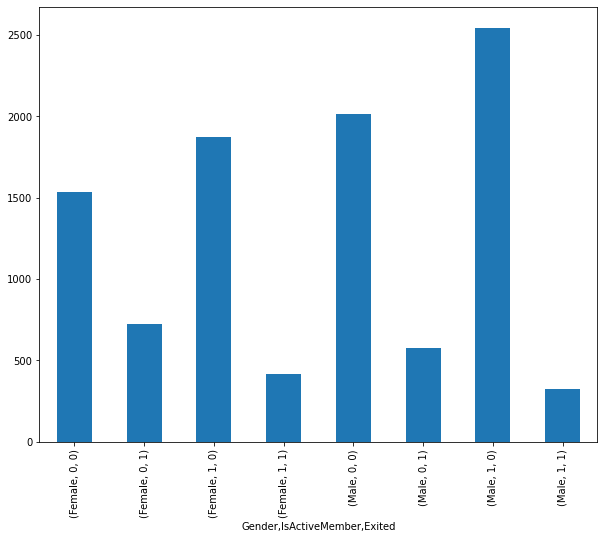

In [ ]:
gp5 = df.groupby(['Gender','IsActiveMember'])['Exited'].value_counts()
gp5.plot(kind='bar',figsize=(10,8))
print(gp5)

In [ ]:
gp6 = df.groupby('Exited')['Balance','EstimatedSalary'].mean()
print(gp6)

             Balance  EstimatedSalary
Exited                               
0       72745.296779     99738.391772
1       91108.539337    101465.677531


# 4. Descriptive statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# 5. Handling the missing values

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **There is no missing value in the dataset**

# 6. Finding outliers

In [ ]:
def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

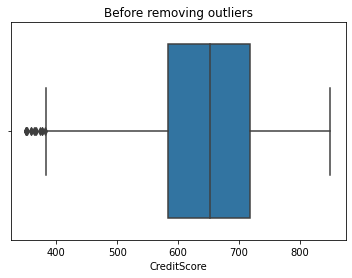

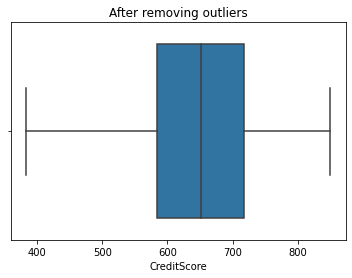

In [ ]:
plt.title("Before removing outliers")
sns.boxplot(df['CreditScore'])
plt.show()
plt.title("After removing outliers")
replace_outliers(df, 'CreditScore')
sns.boxplot(df['CreditScore'])
plt.show()

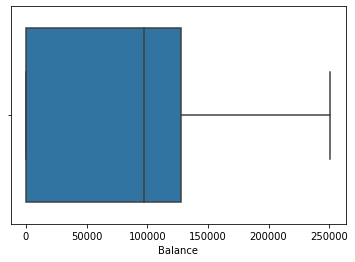

In [ ]:
sns.boxplot(df['Balance'])

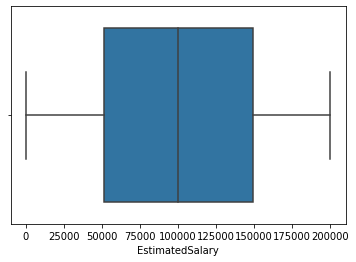

In [ ]:
sns.boxplot(df['EstimatedSalary'])

**Outliers from Age and Credit Score columns are removed**

# 7. Check for categorical column and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


**Only two columns(Gender and Geography) is label encoded**

# Removing unwanted columns and checking for feature importance

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0


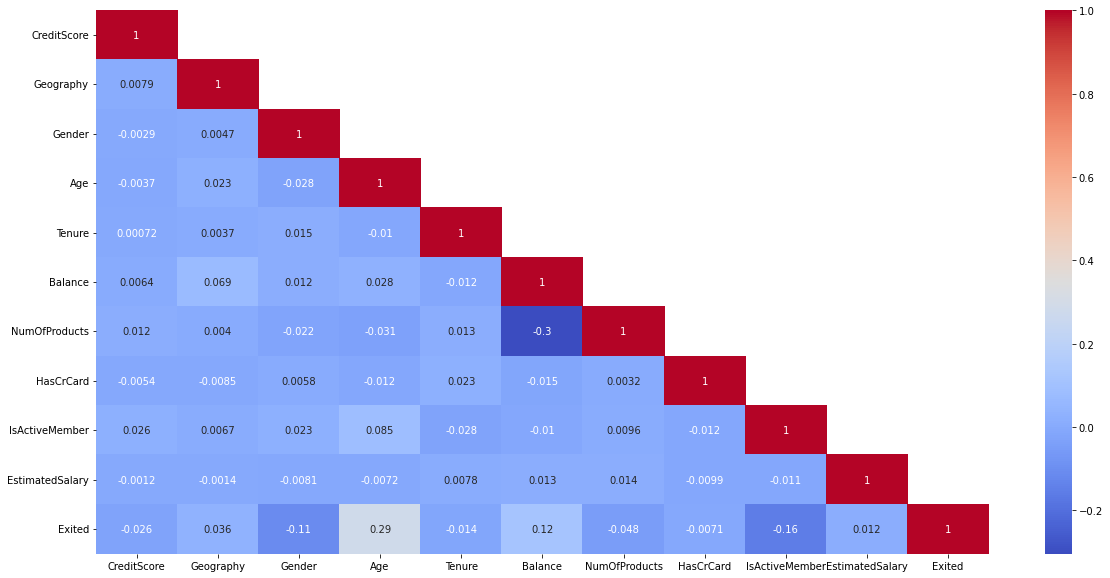

In [51]:
plt.figure(figsize=(20,10))
df_lt = df.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

# 1. The Removed columns are nothing to do with model building.
# 2. Feature importance also checked using pearson correlation.

# 8. Data Splitting

In [52]:
target = df['Exited']
data = df.drop(['Exited'],axis=1)

In [53]:
print(data.shape)
print(target.shape)

(10000, 10)
(10000,)


# 9. Scaling the independent values

In [54]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [55]:
data['CreditScore'] = se.fit_transform(pd.DataFrame(data['CreditScore']))
data['Age'] = se.fit_transform(pd.DataFrame(data['Age']))
data['Balance'] = se.fit_transform(pd.DataFrame(data['Balance']))
data['EstimatedSalary'] = se.fit_transform(pd.DataFrame(data['EstimatedSalary']))

In [56]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326878,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440804,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,-1.538636,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,0.501675,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.065569,2,0,0.388871,2,0.785728,1,1,1,-0.365276


# 10. Train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=101)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)
